In [18]:
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import math


import warnings
warnings.filterwarnings('ignore')

# DATASET I

In [69]:
# importante dataset
df = pd.read_csv('cohort01.csv', encoding = 'latin1', sep = ';')

# renomeando coluna
df.rename(columns = {'ï»¿CustomerID' : 'customer_id',
          'Purchase Date' : 'data_compra',
                    'Amount' : 'qtdade'}, inplace = True)

df

,customer_id,data_compra,qtdade
0,1,8/16/2014,59
1,2,4/24/2014,118
2,3,03/03/2014,57
3,4,07/06/2014,130
4,5,05/05/2014,185
5,6,02/10/2014,92
6,7,2/28/2014,44
7,5,10/07/2014,75
8,3,07/03/2014,103
9,1,12/07/2014,102


In [70]:
# alterando tipo de dado da coluna data_compra
df['data_compra'] = pd.to_datetime(df['data_compra'])

In [71]:
# Criando uma nova coluna 'Order_date' com ano e mes 
df['mes_ano'] = df.data_compra.apply(lambda x: x.strftime('%Y-%m'))
df

,customer_id,data_compra,qtdade,mes_ano
0,1,2014-08-16,59,2014-08
1,2,2014-04-24,118,2014-04
2,3,2014-03-03,57,2014-03
3,4,2014-07-06,130,2014-07
4,5,2014-05-05,185,2014-05
5,6,2014-02-10,92,2014-02
6,7,2014-02-28,44,2014-02
7,5,2014-10-07,75,2014-10
8,3,2014-07-03,103,2014-07
9,1,2014-12-07,102,2014-12


In [72]:
# agrupando e "copiando" o menor valor
df.set_index('customer_id', inplace = True)
df['cohort'] = df.groupby(level=0)['data_compra'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace = True)

df.sort_values('customer_id')

,customer_id,data_compra,qtdade,mes_ano,cohort
0,1,2014-08-16,59,2014-08,2014-08
9,1,2014-12-07,102,2014-12,2014-08
13,1,2014-09-20,34,2014-09,2014-08
1,2,2014-04-24,118,2014-04,2014-04
10,2,2014-04-29,82,2014-04,2014-04
2,3,2014-03-03,57,2014-03,2014-03
8,3,2014-07-03,103,2014-07,2014-03
3,4,2014-07-06,130,2014-07,2014-05
11,4,2014-05-02,141,2014-05,2014-05
4,5,2014-05-05,185,2014-05,2014-05


In [73]:
# agrupando
cohort = df.groupby(['cohort', 'mes_ano'])

# contando valores unicos
cohort2 = cohort.agg({'customer_id' : pd.Series.nunique})

# Renomeando a coluna
cohort2.rename(columns={'customer_id' : 'total_usuarios'}, inplace = True)

cohort2

total_usuarios
cohort  mes_ano                
2014-02 2014-02               2
        2014-08               1
2014-03 2014-03               1
        2014-07               1
2014-04 2014-04               1
2014-05 2014-05               2
        2014-07               1
        2014-10               1
2014-08 2014-08               1
        2014-09               1
        2014-12               1

***

Legenda:

**cohort** : A menor data dentre todos os usuários

**mes_ano** : Mês e ano de compra

**total_usuarios** : Quantidade de usuários agrupados por mês e ano e pela menor data de compra

***

Exemplo: 

Há dois clientes que realizaram a primeira compra em 02/2014 e 1 clientes que comprou pela primeira vez em 02/14 e também em 08/2014.

***


In [74]:
# funcao
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohort2 = cohort2.groupby(level=0).apply(cohort_period)

# Configurando índice
cohort2.reset_index(inplace=True)
cohort2.set_index(['cohort', 'cohort_period'], inplace=True)

cohort2

mes_ano  total_usuarios
cohort  cohort_period                         
2014-02 1              2014-02               2
        2              2014-08               1
2014-03 1              2014-03               1
        2              2014-07               1
2014-04 1              2014-04               1
2014-05 1              2014-05               2
        2              2014-07               1
        3              2014-10               1
2014-08 1              2014-08               1
        2              2014-09               1
        3              2014-12               1

In [76]:
# contando 
cohort_group_size = cohort2['total_usuarios'].groupby(level=0).first()

cohort_group_size

cohort
2014-02    2
2014-03    1
2014-04    1
2014-05    2
2014-08    1
Name: total_usuarios, dtype: int64

In [77]:
cohort2

mes_ano  total_usuarios
cohort  cohort_period                         
2014-02 1              2014-02               2
        2              2014-08               1
2014-03 1              2014-03               1
        2              2014-07               1
2014-04 1              2014-04               1
2014-05 1              2014-05               2
        2              2014-07               1
        3              2014-10               1
2014-08 1              2014-08               1
        2              2014-09               1
        3              2014-12               1

In [78]:
# transformando em colunas
user_retention = cohort2['total_usuarios'].unstack(0).divide(cohort_group_size, axis=1)

user_retention

cohort,2014-02,2014-03,2014-04,2014-05,2014-08
cohort_period,,,,,
1,1.0,1.0,1.0,1.0,1.0
2,0.5,1.0,NaN,0.5,1.0
3,NaN,NaN,NaN,0.5,1.0


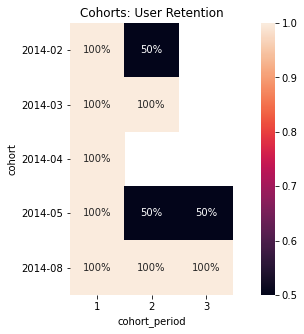

In [80]:
fig, ax = plt.subplots(figsize=(10,5))

plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%', ax=ax, square=True);
plt.yticks(rotation=0)
plt.show()

# DATASET II

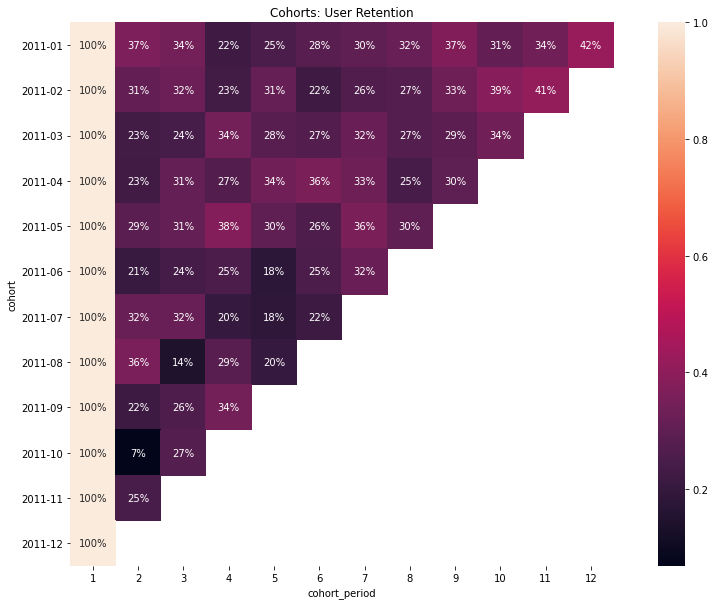

In [41]:
# Importando dataset
df = pd.read_csv('cohort02.csv', sep = ';')

# renomeando as colunas
df.rename(columns = {'Customer ID' : 'customer_id',
                    'Order Date' : 'order_date'}, inplace = True)

# Removendo a coluna unnamed
df.drop(columns=['Unnamed: 2'], inplace = True)


# Alterando o tipo de dado
df['order_date'] = pd.to_datetime(df['order_date'])

# Criando uma nova coluna 'Order_date' com ano e mes 
df['order_period'] = df.order_date.apply(lambda x: x.strftime('%Y-%m'))

# agrupando e "copiando" o menor valor
df.set_index('customer_id', inplace = True)
df['cohort'] = df.groupby(level=0)['order_date'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace = True)

# agrupando
cohort = df.groupby(['cohort', 'order_period'])

# contando valores unicos
cohort2 = cohort.agg({'customer_id' : pd.Series.nunique})

# Renomeando a coluna
cohort2.rename(columns={'customer_id' : 'total_usuarios'}, inplace = True)

# funcao
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohort2 = cohort2.groupby(level=0).apply(cohort_period)

# agrupando
cohort2.reset_index(inplace=True)
cohort2.set_index(['cohort', 'cohort_period'], inplace=True)

cohort_group_size = cohort2['total_usuarios'].groupby(level=0).first()

# transformando em colunas
user_retention = cohort2['total_usuarios'].unstack(0).divide(cohort_group_size, axis=1)

# Plotando
fig, ax = plt.subplots(figsize=(16,10))

plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%', ax=ax, square=True);
plt.yticks(rotation=0)
plt.show()

In [42]:
df.to_csv('teste_cohort.csv', sep = ';')